AttributeError: 'Tensor' object has no attribute 'copy'

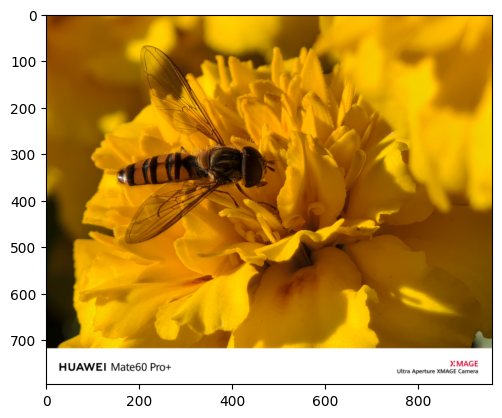

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
import cv2
from PIL import Image
from torchvision import transforms
# 链接  https://blog.csdn.net/m0_47256162/article/details/113355401

k=2

# 读取数据
# flower = load_sample_image('flower.jpg')
# plt.imshow(flower)
image_path = './1.jpeg'
image = Image.open(image_path)
plt.imshow(image)
transform = transforms.ToTensor()
image_tensor = transform(image)

# # 数据处理
# # 图片数据为三维数据，第三维数据为像素信息，将其转为二维数据，代入模型
w,h,d = image_tensor.shape
flower_array = np.reshape(image_tensor ,(w*h,d))

# 对数据进行KMeans矢量量化

# shuffle 将图片二维数据随机排序，取出色素信息训练模型，确定质心，
# 利用已知质心再去分类所有的二位图片色素信息，分为k类，再用这些替换图片色素信息，将二维改为三维，变为图片
image_array_sample = shuffle(flower_array,random_state=0)[:1000]
kms = KMeans(n_clusters=k,random_state=0).fit(image_array_sample)
label=kms.predict(flower_array)
image_kmeans=flower_array.copy()
for i in range(w*h):
    image_kmeans[i] = kms.cluster_centers_[label[i]]
pd.DataFrame(image_kmeans).drop_duplicates().shape
image_kmeans=image_kmeans.reshape(w,h,d)

# 显示图片

# plt.imshow(img_opencv)


